In [30]:
using DelimitedFiles 
using Distributed
using PyPlot
using Printf
import FlowFarm; const ff = FlowFarm
using BenchmarkTools
using PyPlot

# Borssele

## 100 directions

### Set Up

In [31]:
# include case information
include("./inputfiles/model_set_7_ieacs4_100dir.jl");

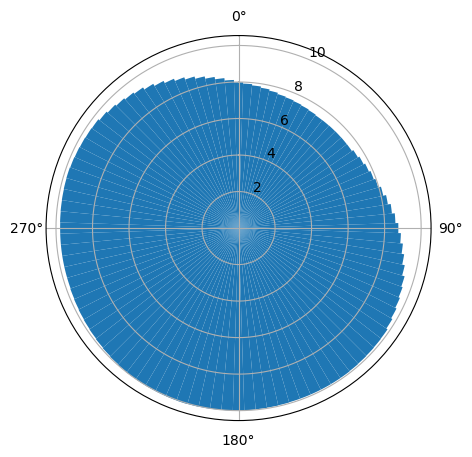

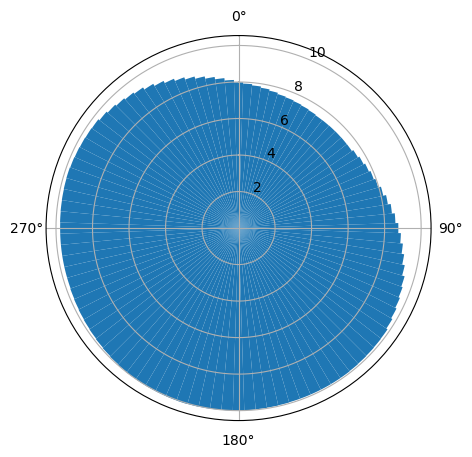

In [32]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_borssele_100dir_speed.pdf")

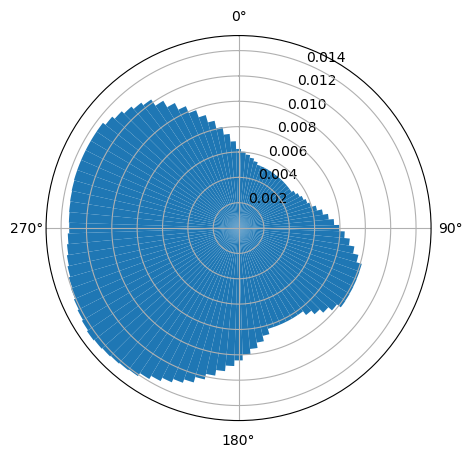

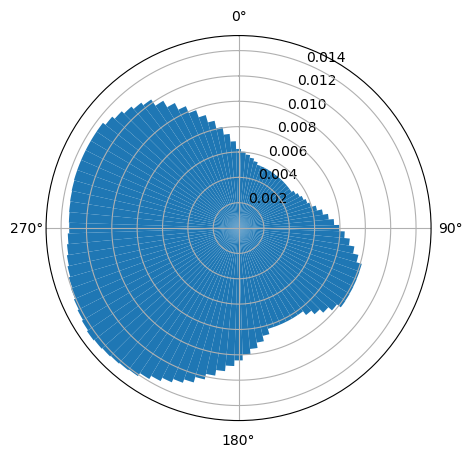

In [33]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_borssele_100dir_probability.pdf")

### Run TIP Model

In [34]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

5.148139212690379e12

5.148139212690379e12

In [35]:
@benchmark ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

BenchmarkTools.Trial: 
  memory estimate:  16.64 MiB
  allocs estimate:  72214
  --------------
  minimum time:     11.053 ms (0.00% GC)
  median time:      15.387 ms (0.00% GC)
  mean time:        15.702 ms (11.59% GC)
  maximum time:     51.248 ms (0.00% GC)
  --------------
  samples:          319
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  16.64 MiB
  allocs estimate:  72214
  --------------
  minimum time:     11.053 ms (0.00% GC)
  median time:      15.387 ms (0.00% GC)
  mean time:        15.702 ms (11.59% GC)
  maximum time:     51.248 ms (0.00% GC)
  --------------
  samples:          319
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [36]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.642059231495327e12

4.642059231495327e12

In [37]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  869.52 KiB
  allocs estimate:  1445
  --------------
  minimum time:     41.497 ms (0.00% GC)
  median time:      43.406 ms (0.00% GC)
  mean time:        45.184 ms (0.07% GC)
  maximum time:     68.930 ms (0.00% GC)
  --------------
  samples:          111
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  869.52 KiB
  allocs estimate:  1445
  --------------
  minimum time:     41.497 ms (0.00% GC)
  median time:      43.406 ms (0.00% GC)
  mean time:        45.184 ms (0.07% GC)
  maximum time:     68.930 ms (0.00% GC)
  --------------
  samples:          111
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [38]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

2.1005480119253782e12

2.1005480119253782e12

In [39]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  869.61 KiB
  allocs estimate:  1444
  --------------
  minimum time:     58.923 ms (0.00% GC)
  median time:      74.218 ms (0.00% GC)
  mean time:        80.077 ms (0.03% GC)
  maximum time:     201.507 ms (0.00% GC)
  --------------
  samples:          63
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  869.61 KiB
  allocs estimate:  1444
  --------------
  minimum time:     58.923 ms (0.00% GC)
  median time:      74.218 ms (0.00% GC)
  mean time:        80.077 ms (0.03% GC)
  maximum time:     201.507 ms (0.00% GC)
  --------------
  samples:          63
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [40]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

3.316378037611917e12

3.316378037611917e12

In [41]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  868.17 KiB
  allocs estimate:  1443
  --------------
  minimum time:     111.786 ms (0.00% GC)
  median time:      116.844 ms (0.00% GC)
  mean time:        137.214 ms (0.00% GC)
  maximum time:     248.092 ms (0.00% GC)
  --------------
  samples:          37
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  868.17 KiB
  allocs estimate:  1443
  --------------
  minimum time:     111.786 ms (0.00% GC)
  median time:      116.844 ms (0.00% GC)
  mean time:        137.214 ms (0.00% GC)
  maximum time:     248.092 ms (0.00% GC)
  --------------
  samples:          37
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [42]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.0362681433538696e12

4.0362681433538696e12

In [43]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  104.67 MiB
  allocs estimate:  973440
  --------------
  minimum time:     116.204 ms (3.08% GC)
  median time:      139.414 ms (3.21% GC)
  mean time:        162.989 ms (3.28% GC)
  maximum time:     322.174 ms (5.71% GC)
  --------------
  samples:          31
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  104.67 MiB
  allocs estimate:  973440
  --------------
  minimum time:     116.204 ms (3.08% GC)
  median time:      139.414 ms (3.21% GC)
  mean time:        162.989 ms (3.28% GC)
  maximum time:     322.174 ms (5.71% GC)
  --------------
  samples:          31
  evals/sample:     1

### Compare TIP vs TopHat

In [44]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.2f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.2f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.2f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.2f%%\n", ErrorTIPvsBastankhah)

TIP AEP: 5.148139212690379e12
Jensen Top Hat AEP:   4.642059231495327e12
Jensen Cosine AEP:   2.1005480119253782e12
Multi-Zone AEP:   4.0362681433538696e12
Bastankhah AEP:   3.316378037611917e12
Error vs Jensen Top Hat:  10.90%
Error vs Jensen Cosine:   145.09%
Error vs Multi-Zone:  27.55%
Error vs Bastankhah:   55.23%
TIP AEP: 5.148139212690379e12
Jensen Top Hat AEP:   4.642059231495327e12
Jensen Cosine AEP:   2.1005480119253782e12
Multi-Zone AEP:   4.0362681433538696e12
Bastankhah AEP:   3.316378037611917e12
Error vs Jensen Top Hat:  10.90%
Error vs Jensen Cosine:   145.09%
Error vs Multi-Zone:  27.55%
Error vs Bastankhah:   55.23%


## 360 directions

### Set Up

In [45]:
# include case information
include("./inputfiles/model_set_7_ieacs4_360dir.jl");
nturbines

81

81

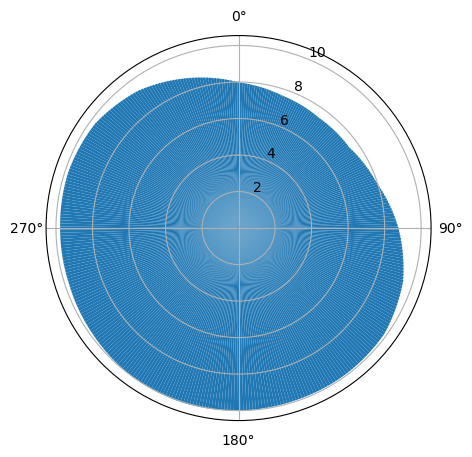

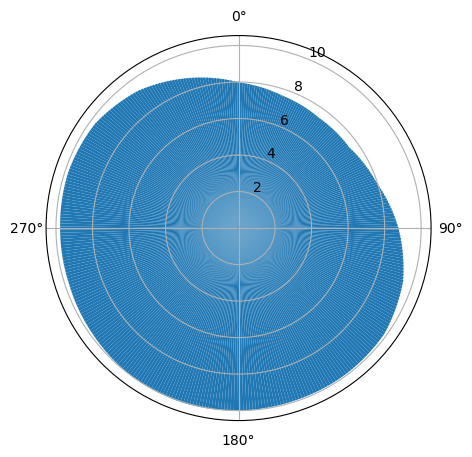

In [46]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windspeeds
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_borssele_360dir_speed.pdf")

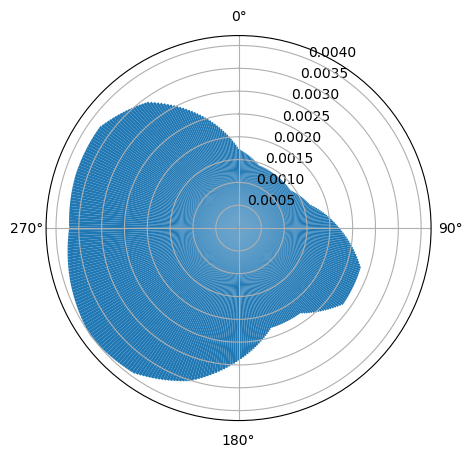

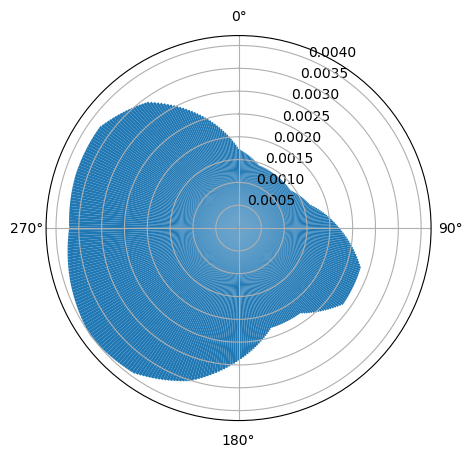

In [47]:
# plot wind rose
theta = winddirections
dtheta = 90
width = theta[2]-theta[1]
r = windprobabilities
fig = figure("pyplot_windrose_barplot",figsize=(5,5)) # Create a new figure
ax = PyPlot.axes(polar="true") # Create a polar axis
# PyPlot.title("Wind Rose - Bar")
b = bar(theta,r,width=width) # Bar plot

ax.set_thetagrids(collect(0:dtheta:360-dtheta)) # Show grid lines from 0 to 360 in increments of dtheta
ax.set_theta_zero_location("N") # Set 0 degrees to the top of the plot
ax.set_theta_direction(-1) # Switch to clockwise
fig.canvas.draw() # Update the figure
savefig("windrose_borssele_360dir_probability.pdf")

### Run TIP Model

In [48]:
AEPTIP = ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

5.147708246798265e12

5.147708246798265e12

In [49]:
@benchmark ff.tip_get_aep(turbine_x,turbine_y,wind_data,cpdata,ctdata, pstep=0.01, prated=rated_power[1], u_cut_in=cut_in_speed[1], u_cut_out=cut_out_speed[1], density=air_density, r0=diam/2.0, alpha=0.01)

BenchmarkTools.Trial: 
  memory estimate:  43.11 MiB
  allocs estimate:  72214
  --------------
  minimum time:     21.554 ms (0.00% GC)
  median time:      35.707 ms (38.30% GC)
  mean time:        35.463 ms (37.09% GC)
  maximum time:     44.428 ms (34.71% GC)
  --------------
  samples:          141
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  43.11 MiB
  allocs estimate:  72214
  --------------
  minimum time:     21.554 ms (0.00% GC)
  median time:      35.707 ms (38.30% GC)
  mean time:        35.463 ms (37.09% GC)
  maximum time:     44.428 ms (34.71% GC)
  --------------
  samples:          141
  evals/sample:     1

### Run FLOWFarm - Jensen TopHat Model

In [50]:
wakedeficitmodel = ff.JensenTopHat()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJTH = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.641646073369198e12

4.641646073369198e12

In [51]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5087
  --------------
  minimum time:     150.765 ms (0.00% GC)
  median time:      155.737 ms (0.00% GC)
  mean time:        175.573 ms (0.06% GC)
  maximum time:     336.873 ms (0.00% GC)
  --------------
  samples:          29
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5087
  --------------
  minimum time:     150.765 ms (0.00% GC)
  median time:      155.737 ms (0.00% GC)
  mean time:        175.573 ms (0.06% GC)
  maximum time:     336.873 ms (0.00% GC)
  --------------
  samples:          29
  evals/sample:     1

### Run FLOWFarm - Jensen Cosine Model

In [52]:
wakedeficitmodel = ff.JensenCosine()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPJC = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

2.0965751496899873e12

2.0965751496899873e12

In [53]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5086
  --------------
  minimum time:     215.357 ms (0.00% GC)
  median time:      307.164 ms (0.00% GC)
  mean time:        297.810 ms (0.04% GC)
  maximum time:     414.615 ms (0.43% GC)
  --------------
  samples:          17
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5086
  --------------
  minimum time:     215.357 ms (0.00% GC)
  median time:      307.164 ms (0.00% GC)
  mean time:        297.810 ms (0.04% GC)
  maximum time:     414.615 ms (0.43% GC)
  --------------
  samples:          17
  evals/sample:     1

### Run FLOWFarm - Bastankhah Model

In [54]:
wakedeficitmodel = ff.GaussYaw()
wakedeflectionmodel = ff.GaussYawDeflection()
wakecombinationmodel = ff.LinearLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelMaxTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPB = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

3.3159800188558447e12

3.3159800188558447e12

In [55]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5083
  --------------
  minimum time:     402.828 ms (0.00% GC)
  median time:      406.277 ms (0.00% GC)
  mean time:        406.150 ms (0.00% GC)
  maximum time:     408.475 ms (0.00% GC)
  --------------
  samples:          13
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  3.05 MiB
  allocs estimate:  5083
  --------------
  minimum time:     402.828 ms (0.00% GC)
  median time:      406.277 ms (0.00% GC)
  mean time:        406.150 ms (0.00% GC)
  maximum time:     408.475 ms (0.00% GC)
  --------------
  samples:          13
  evals/sample:     1

### Run FLOWFarm MultiZone Model

In [56]:
wakedeficitmodel = ff.Multizone()
wakedeflectionmodel = ff.JiminezYawDeflection()
wakecombinationmodel = ff.SumOfSquaresLocalVelocitySuperposition()
localtimodel = ff.LocalTIModelNoLocalTI()
model_set = ff.WindFarmModelSet(wakedeficitmodel, wakedeflectionmodel, wakecombinationmodel, localtimodel)

AEPM = ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

4.035455879077523e12

4.035455879077523e12

In [57]:
@benchmark ff.calculate_aep(turbine_x, turbine_y, turbine_z, rotor_diameter,
                hub_height, turbine_yaw, ct_models, generator_efficiency, cut_in_speed,
                cut_out_speed, rated_speed, rated_power, windresource, power_models, model_set,
                rotor_sample_points_y=rotor_points_y,rotor_sample_points_z=rotor_points_z)

BenchmarkTools.Trial: 
  memory estimate:  376.80 MiB
  allocs estimate:  3504280
  --------------
  minimum time:     425.320 ms (3.39% GC)
  median time:      430.647 ms (3.82% GC)
  mean time:        435.953 ms (3.64% GC)
  maximum time:     480.297 ms (3.19% GC)
  --------------
  samples:          12
  evals/sample:     1

BenchmarkTools.Trial: 
  memory estimate:  376.80 MiB
  allocs estimate:  3504280
  --------------
  minimum time:     425.320 ms (3.39% GC)
  median time:      430.647 ms (3.82% GC)
  mean time:        435.953 ms (3.64% GC)
  maximum time:     480.297 ms (3.19% GC)
  --------------
  samples:          12
  evals/sample:     1

### Compare TIP vs TopHat

In [58]:
ErrorTIPvsTopHat = 100*(AEPTIP-AEPJTH)/AEPJTH
ErrorTIPvsCosine = 100*(AEPTIP-AEPJC)/AEPJC
ErrorTIPvsMultizone = 100*(AEPTIP-AEPM)/AEPM
ErrorTIPvsBastankhah = 100*(AEPTIP-AEPB)/AEPB
println("TIP AEP: ", AEPTIP)
println("Jensen Top Hat AEP:   ", AEPJTH)
println("Jensen Cosine AEP:   ", AEPJC)
println("Multi-Zone AEP:   ", AEPM)
println("Bastankhah AEP:   ", AEPB)
@printf("Error vs Jensen Top Hat:  %.3f%%\n", ErrorTIPvsTopHat)
@printf("Error vs Jensen Cosine:   %.3f%%\n", ErrorTIPvsCosine)
@printf("Error vs Multi-Zone:  %.3f%%\n", ErrorTIPvsMultizone)
@printf("Error vs Bastankhah:   %.3f%%\n", ErrorTIPvsBastankhah)

TIP AEP: 5.147708246798265e12
Jensen Top Hat AEP:   4.641646073369198e12
Jensen Cosine AEP:   2.0965751496899873e12
Multi-Zone AEP:   4.035455879077523e12
Bastankhah AEP:   3.3159800188558447e12
Error vs Jensen Top Hat:  10.903%
Error vs Jensen Cosine:   145.529%
Error vs Multi-Zone:  27.562%
Error vs Bastankhah:   55.239%
TIP AEP: 5.147708246798265e12
Jensen Top Hat AEP:   4.641646073369198e12
Jensen Cosine AEP:   2.0965751496899873e12
Multi-Zone AEP:   4.035455879077523e12
Bastankhah AEP:   3.3159800188558447e12
Error vs Jensen Top Hat:  10.903%
Error vs Jensen Cosine:   145.529%
Error vs Multi-Zone:  27.562%
Error vs Bastankhah:   55.239%
